# <center> Data Augmentation Project using Numpy </center>

We need to apply data augmentation techniques on our images in order to form new and different examples from our existing training dataset, hence improve the performance of our classifier. For this purpose, we developed and deployed a Python library called "TunAugmentor" to perform these techniques.

This is the github link to our library: https://github.com/ahmedbelgacem/TunAugmentor

In [4]:
!pip install TunAugmentor

  Using cached opencv_python-4.5.4.60-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.3 MB)
  Created wheel for TunAugmentor: filename=TunAugmentor-0.2-py3-none-any.whl size=10105 sha256=e34e2fe74c3d950aea0b434c97bc0b324a184571b64721fa36c33e3e53cfa3fa
  Stored in directory: /home/ahmed/.cache/pip/wheels/0a/97/49/b8cf54a9f30815a1a435e67ed6f022972e545c9e004b040b65
Successfully built TunAugmentor


# I. Import and explore the data

In [1]:
#import the original images
from TunAugmentor.utils import read_images
dogs = read_images('./Original Dogs')
trees = read_images('./Original Trees')

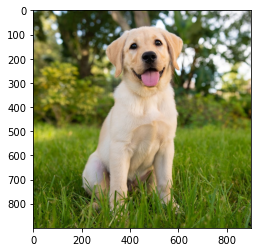

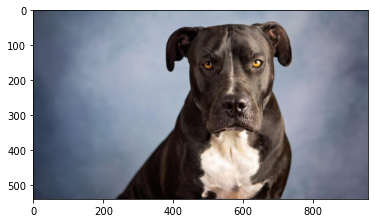

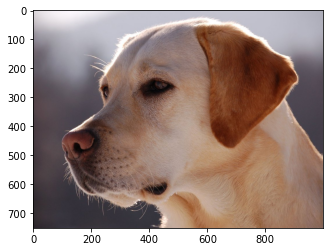

In [2]:
#Visualize some original dog images
import matplotlib.pyplot as plt
import cv2
for i in range(3):
    plt.imshow(cv2.cvtColor(dogs[i], cv2.COLOR_BGR2RGB))
    plt.show()

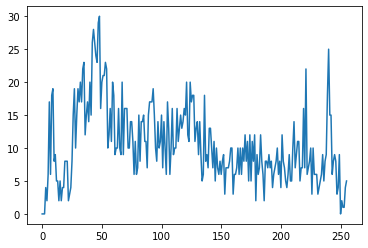

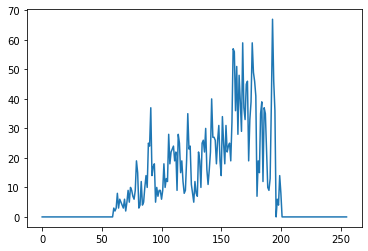

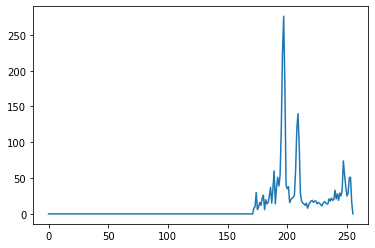

In [3]:
#Visualize the histograms of these dog images
for i in range(3):
    #First, find frequency of pixels in range 0-255
    histogram = cv2.calcHist(images=dogs[i], channels=[0], mask=None, histSize=[256], ranges=[0,256])
    #show the plotting graph of the images
    plt.plot(histogram)
    plt.show()

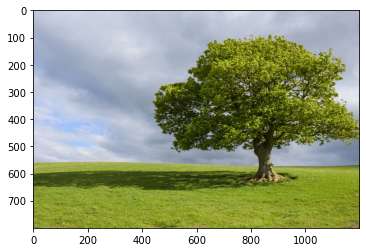

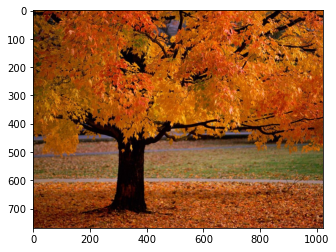

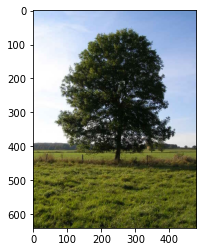

In [4]:
#Visualize some original tree images
import cv2
for i in range(1,4):
    plt.imshow(cv2.cvtColor(trees[i], cv2.COLOR_BGR2RGB))
    plt.show()

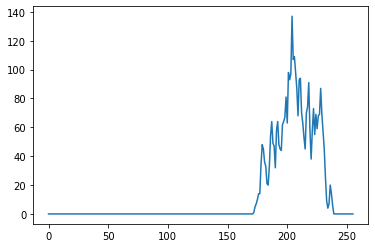

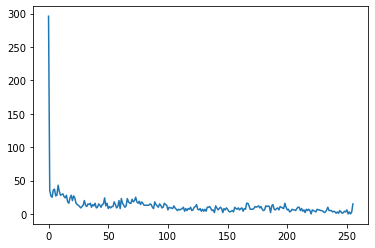

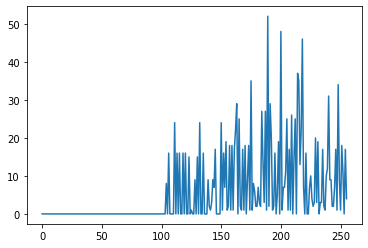

In [5]:
#Visualize the histograms of these tree images
for i in range(1,4):
    #First, find frequency of pixels in range 0-255
    histogram = cv2.calcHist(images=trees[i], channels=[0], mask=None, histSize=[256], ranges=[0,256])
    #show the plotting graph of the images
    plt.plot(histogram)
    plt.show()

Now that we have imported and visualized our data, let's start the data augmentation phase by performing our transformation techniques using our own TunAugmentor package.

# II. Data Augmentation (Image Processing)

In [6]:
#import the necessary classes for Image Processing from TunAugmentor library
from TunAugmentor.transformations.rotations import Rotation, Transpose
from TunAugmentor.transformations.flips import Flip, FlipVertical, FlipHorizontal
from TunAugmentor.transformations.translations import Translation, TranslationX, TranslationY
from TunAugmentor.transformations.zoom import CenterZoom
from TunAugmentor.transformations.pixel_transformations import ColorModification, AddGaussianNoise, ChangeBrightness

In [7]:
#create a pipeline, an ensemble of multiple transformations
from TunAugmentor.pipeline import Pipeline
Augmentor=Pipeline([Rotation(angle=45), Transpose(), Flip(v=1,h=1), FlipVertical(), FlipHorizontal(),
                    Translation(shift_along_x=100, shift_along_y=100, color_value=120),
                    TranslationX(shift_along_x=180, color_value=80), TranslationY(shift_along_y=120, color_value=150),
                    CenterZoom(zoom_factor=2), ColorModification(red_shift=40, green_shift=50, blue_shift=30),
                    AddGaussianNoise(mean=50, var=1000), ChangeBrightness(brightness_value=60)])

In [8]:
#apply all the transformations on all our images
#this step may need some time to process, depending on the computing power of the hardware (around 30 seconds)
dogs=Augmentor.apply(images=dogs)
trees=Augmentor.apply(images=trees)

2021-12-23 20:42:59,332 - TunAugmentor - INFO - Applying Rotation on 5 images
2021-12-23 20:43:11,629 - TunAugmentor - INFO - Applying Transpose on 5 images
2021-12-23 20:43:11,630 - TunAugmentor - INFO - Applying Flip on 5 images
2021-12-23 20:43:11,631 - TunAugmentor - INFO - Applying FlipVertical on 5 images
2021-12-23 20:43:11,631 - TunAugmentor - INFO - Applying FlipHorizontal on 5 images
2021-12-23 20:43:11,632 - TunAugmentor - INFO - Applying Translation on 5 images
2021-12-23 20:43:11,638 - TunAugmentor - INFO - Applying TranslationX on 5 images
2021-12-23 20:43:11,644 - TunAugmentor - INFO - Applying TranslationY on 5 images
2021-12-23 20:43:11,650 - TunAugmentor - INFO - Applying CenterZoom on 5 images
2021-12-23 20:43:11,710 - TunAugmentor - INFO - Applying ColorModification on 5 images
2021-12-23 20:43:11,723 - TunAugmentor - INFO - Applying AddGaussianNoise on 5 images
2021-12-23 20:43:11,946 - TunAugmentor - INFO - Applying ChangeBrightness on 5 images
2021-12-23 20:43:11

In [9]:
#crop the images with the same shape, since the logistic regression model needs to have the same input shape for all images
from TunAugmentor.transformations.crops import CenterCrop
dogs=CenterCrop(width=420, height=420).transform(images=dogs)
trees=CenterCrop(width=420, height=420).transform(images=trees)

In [10]:
#save all transformed images in our new paths destined for transformed images
from TunAugmentor.utils import export
export(images=dogs, path='./Transformed Dogs')
export(images=trees, path='./Transformed Trees')

True

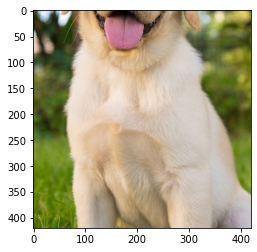

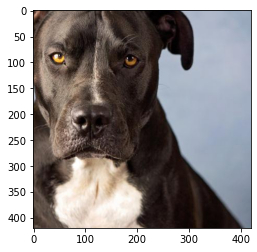

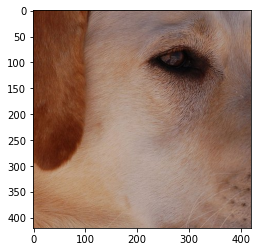

In [11]:
#Visualize some horizontally flipped dog images (also after cropping)
for i in range(25,28):
    plt.imshow(cv2.cvtColor(dogs[i], cv2.COLOR_BGR2RGB))
    plt.show()

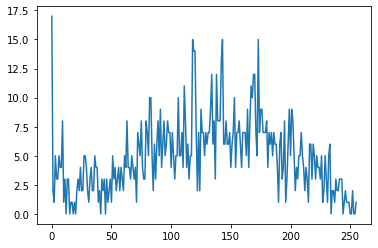

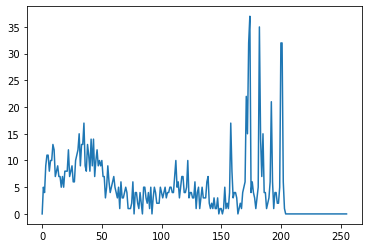

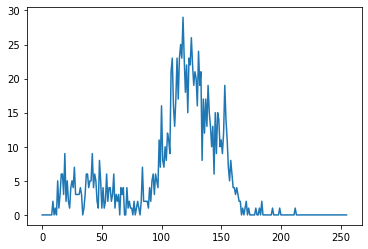

In [12]:
#Visualize the histograms of these horizontally flipped dog images (also after cropping)
for i in range(25,28):
    #First, find frequency of pixels in range 0-255
    histogram = cv2.calcHist(images=dogs[i], channels=[0], mask=None, histSize=[256], ranges=[0,256])
    #show the plotting graph of the images
    plt.plot(histogram)
    plt.show()

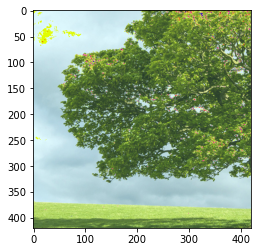

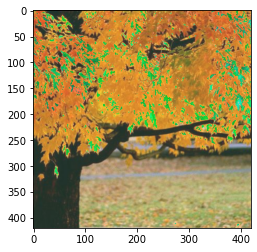

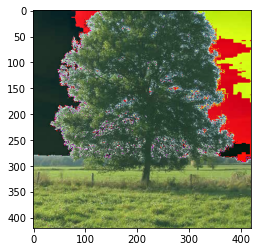

In [13]:
#Visualize some transformed tree images after color modification (also after cropping)
for i in range(51,54):
    plt.imshow(cv2.cvtColor(trees[i], cv2.COLOR_BGR2RGB))
    plt.show()

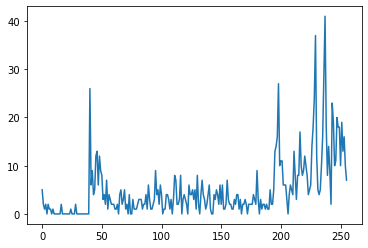

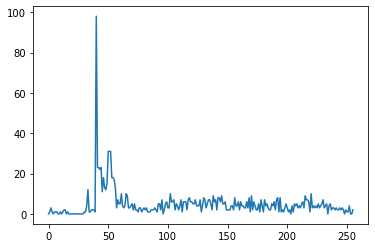

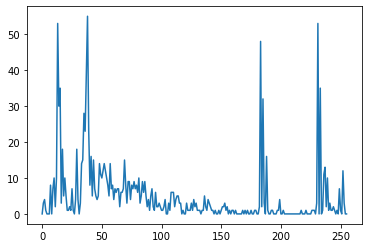

In [14]:
#Visualize the histograms of these transformed tree images after color modification (also after cropping)
for i in range(51,54):
    #First, find frequency of pixels in range 0-255
    histogram = cv2.calcHist(images=trees[i], channels=[0], mask=None, histSize=[256], ranges=[0,256])
    # show the plotting graph of the images
    plt.plot(histogram)
    plt.show()

In [15]:
#Flatten the images in order to be in the form of a 1-dimensional linear vector
flattened_data = []
label = []
for i in range(len(dogs)):
    #flatten the dog images
    flattened_data.append(dogs[i].flatten())
    #create the label list for the dog class
    label.append('dog') 
for i in range(len(trees)):
    #flatten the tree images
    flattened_data.append(trees[i].flatten())
    #create the label list for the tree class
    label.append('tree')

In [16]:
print("Our dataset length is", len(flattened_data))
#All images have the same length after getting cropped and flattened
print("The shape of the last image after getting flattened is", flattened_data[129].shape)

Our dataset length is 130
The shape of the last image after getting flattened is (529200,)


In [17]:
#train_test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flattened_data, label,
                                                    stratify=label, shuffle=True, test_size = 0.3, random_state = 2021)

In [18]:
print('X_train first entry is', X_train[0], 'and its label is', y_train[0])

X_train first entry is [131.34643955 125.25441823 122.16140951 ...  30.92457751 148.12606212
  71.70275609] and its label is dog


Now that we have our dataset ready after performing image data augmentation and train_test split, let's apply our binary classifier to check whether these techniques were helpful to increase the accuracy.

# III. Logistic Regression Implementation:

## 1. Model Creation:

In [19]:
#Import the needed library to build Logistic Regression model
from sklearn.linear_model import LogisticRegression
#Fit Logistic Regression model
model = LogisticRegression(random_state=12).fit(X_train, y_train)

## 2. Model Evaluation:

In [20]:
#Get predictions
ypred=model.predict(X_test)
print(ypred)

['tree' 'tree' 'dog' 'dog' 'dog' 'tree' 'dog' 'tree' 'tree' 'dog' 'dog'
 'dog' 'dog' 'tree' 'dog' 'dog' 'tree' 'dog' 'dog' 'tree' 'dog' 'dog'
 'tree' 'tree' 'dog' 'dog' 'tree' 'dog' 'dog' 'tree' 'dog' 'dog' 'dog'
 'dog' 'tree' 'dog' 'dog' 'dog' 'dog']


In [21]:
from sklearn.metrics import classification_report
# display classification report
print('Logistic Regression:\n\n {}\n'.format(classification_report(y_true=y_test, y_pred=ypred)))

Logistic Regression:

               precision    recall  f1-score   support

         dog       0.77      1.00      0.87        20
        tree       1.00      0.68      0.81        19

    accuracy                           0.85        39
   macro avg       0.88      0.84      0.84        39
weighted avg       0.88      0.85      0.84        39




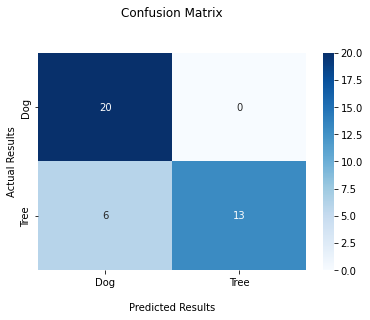

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=ypred)
confusionmatrix = sns.heatmap(cm, annot=True, cmap='Blues')

confusionmatrix.set_title('Confusion Matrix\n\n');
confusionmatrix.set_xlabel('\nPredicted Results')
confusionmatrix.set_ylabel('Actual Results');

# Ticket labels
confusionmatrix.xaxis.set_ticklabels(['Dog','Tree'])
confusionmatrix.yaxis.set_ticklabels(['Dog','Tree'])

# Display the visualization of the Confusion Matrix
plt.show()

We can notice that the recall (also known as sensitivity) is equal to 0.90 and 0.79 for 'dog' and 'tree' classes respectively. So, we conclude that our model is able to correctly identify 90% of the dogs and 79% of the trees.
With that being said, the image data augmentation techniques were efficient since they allowed us to get an accuracy of 0.85 which is considered as a good result.